# A. Parte I: Comprension del problema de ML

# 1) 
Describa de manera clara el problema de predicción que esta abordando, su campo de aplicación y explique si corresponde a un problema de clasificacion o de regresion.

# 2)
Enumere las variables incluidas como entrada al sistema
y la o las variables a predecir. Explique claramente el
tipo de codificacion de cada variable y, si la base de  ́
datos cuenta con valores faltantes, explique como se  ́
llenaron los vac ́ıos en cada caso.

In [1]:
import pandas as pd
import numpy as np

In [2]:
db=pd.read_csv('Database/DataOriginal.csv',header=1)

In [3]:
db=db.rename(columns={'default payment next month': 'DEF_PAY', 
                        'PAY_0': 'PAY_1'})

In [4]:
db.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Variables de entrada

In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

## Variable de salida

## Valores faltantes o no documentados

In [6]:
categorical_columns=['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','DEF_PAY']
for col in categorical_columns:
     print(db.groupby(col)['ID'].nunique())
#    db.groupby(col)['ID'].count().plot(kind='bar')

SEX
1    11888
2    18112
Name: ID, dtype: int64
EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: ID, dtype: int64
MARRIAGE
0       54
1    13659
2    15964
3      323
Name: ID, dtype: int64
PAY_1
-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: ID, dtype: int64
PAY_2
-2     3782
-1     6050
 0    15730
 1       28
 2     3927
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
Name: ID, dtype: int64
PAY_3
-2     4085
-1     5938
 0    15764
 1        4
 2     3819
 3      240
 4       76
 5       21
 6       23
 7       27
 8        3
Name: ID, dtype: int64
PAY_4
-2     4348
-1     5687
 0    16455
 1        2
 2     3159
 3      180
 4       69
 5       35
 6        5
 7       58
 8        2
Name: ID, dtype: int64
PAY_5
-2     4546
-1     5539
 0    16947
 2     2626
 3      178
 4       84
 5       17
 6        4
 7       58
 8     

In [7]:
db=db.drop('ID',axis=1)
db.loc[((db.EDUCATION == 5) | (db.EDUCATION == 6) | (db.EDUCATION == 0)),'EDUCATION']=4

for col in ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',]:
    db[col]=np.where(db[col] == -2, 0, db[col])
    db[col]=np.where(db[col] == -1, 0, db[col])


In [8]:
db.sample(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
26545,200000,2,2,1,50,0,0,0,0,0,...,359,672,1620,453,348,359,672,1620,384,0
17913,70000,1,1,2,33,0,0,0,0,0,...,65169,64370,15082,2870,3224,1680,3000,142,142,0
5436,150000,1,1,1,41,1,0,0,0,0,...,5431,0,0,0,1800,5431,0,0,0,0
15197,140000,2,2,2,26,0,0,0,0,0,...,101065,64570,51521,10207,9120,3000,2117,2000,2000,0
24161,470000,1,1,2,29,0,0,0,0,0,...,212373,193628,184908,7395,8037,9048,10000,6115,5750,0


In [9]:
db.to_csv('./Database/DB_v1.csv')

# 3 
Realice una busqueda de al menos 4 art  ́  ́ıculos que hayan
abordado el mismo problema de aprendizaje que Uds
estan trabajando. Incluya, en la medida de lo posible,  ́
trabajos que hayan empleado la misma base de datos.
Describa brevemente:
• ¿Que t  ́ ecnica(s) de aprendizaje usan en los art  ́  ́ıculos?
• ¿Que metodolog  ́  ́ıa de validacion usaron?  ́
• ¿Cuales fueron los resultados obtenidos en cada uno  ́
de los trabajos citados?
Se recomienda buscar trabajos en las bases de datos:
www.sciencedirect.com y www.ieeexplore.org. Tambien ́
se pueden buscar trabajos en la base de datos
http://link.springer.com, pero se debe tener en cuenta
que el acceso que tiene la Universidad es mucho mas ́

limitado para dicha base de datos. Incluir preferible-
mente art ́ıculos publicados en revista no en congre-
sos o conferencias. Se recomienda utilizar el buscador

https://scholar.google.com para encontrar art ́ıculos que
hayan citado la base de datos seleccionada. No utilice
mas de una p  ́ agina del informe para esta descripci

1. Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.
https://github.com/wangzongyan/Default-of-credit-card-clients-Data-Project/blob/master/The%20comparisons%20of%20data%20mining%20techniques%20for%20the%20predictive%20accuracy%20of%20probability%20of%20default%20of%20credit%20card%20clients.pdf

2. Predicting Credit Card Defaults with Deep Learning and Other Machine Learning Models 
http://www.ijcte.org/vol10/1208-CT0006.pdf

3. An experimental comparison of classification algorithms for imbalanced credit scoring data sets
https://aplicacionesbiblioteca.udea.edu.co:2062/science/article/pii/S095741741101342X

4. Application of Machine Learning Algorithms in Credit Card Default Payment Prediction
  
https://www.worldwidejournals.com/international-journal-of-scientific-research-(IJSR)/article/application-of-machine-learning-algorithms-in-credit-card-default-payment-prediction/MTcwMzU=/?is=1&b1=57&k=15


https://www.researchgate.net/publication/328026972_Application_of_Machine_Learning_Algorithms_in_Credit_Card_Default_Payment_Prediction/link/5bb49ae8299bf13e605d7e81/download


| Artículo | Modelos                                                                                                                           | Validación                  | Resultados                                                                                                                                                                                                           | Info útil                                                                                                                                                |
|----------|-----------------------------------------------------------------------------------------------------------------------------------|-----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|
|     1    |                  Knn Regresión logística Análisis discriminante Naive Bayes Redes Neuronales Árboles de decisión                  |         Bootstraping        |                            Utilizaron la curva roc como métrica, KNN y arboles de  decisión parecen quedar en overfit el multilayer perceptron obtuvo los mejores resultados en validación                           | Como no se encuentra balanceado se debe considerar que el error de validación no es la mejor opción para seleccionar el mejor modelo, si no la curva roc |
|     2    |                            KNN Regresión logística Naive Bayes C4.5 arbol de decisión Deep learning DNN                           |        No mencionada        |                       Los mejores resultados se obtuvieron con el modelo de DNN con características reducidas pero en accuracy, precision, recall la estrategia de validación no fue mencionado                      |  En el arbol de decisión eligieron el tamaño máximo de partición con base en k-means clustering,  se usó selección de características con el índice grey |
|     3    | Regresión logística Análisis discriminante cuadrático Redes neuronales SVM lS Arbol de decisión Knn Random forest Gradiente boost |         Bootstraping        | Se utilizó como métrica el área bajo la curva estadística de friedman y pruebas post hoc de Nemenyi los mejores resultados fueron el random forest y el gradient boost,fue mejor el sobremuestreo que el submuestreo |                                Analizaron cinco conjuntos diferentes  utilizaron técnicas de sobremuestreo y submuestreo.                                |
|     4    |                       Regresion logística Árbol de decisión SVM Naive Bayes Knn Bagging, stacking y Boosting                      | Bootstraping 10 iteraciones |                        Evaluarion sensibilidad y especificidad con el conjunto original y las características extraídas, los mejores resultados fueron obtenidos con SVM y regresión logística                       |                                  Selección de características con método wrapper eliminaron valores atípicos y extremos                                  |

# 4
Incluya una sesion dentro de su informe con el nombre Experimentos, en la cual describa la metodolog ́ıa de validacion usada y la base de datos que est  ́ a usando  ́
para llevar a cabo el proyecto, incluyendo la fuente
de la base de datos como referencia, el numero de  ́
muestras, variables, la distribucion de muestras por  ́
clase, etc. Si la base de datos esta desbalanceada,  ́
deben considerar el uso de tecnicas de submuestreo y  ́
sobremuestreo inteligente, ademas de usar estrategia de  ́
validacion apropiada. 
En esta seccion deben especificar las medidas de desempeño que usaran para evaluar el sistema, indicando la  ́ medida principal. En caso de que utilicen medidas diferentes a las vistas en clase, deben incluir las definiciones correspondientes que permitan al lector comprender la medida.

1) Tomando como referencia la metodología de validación utilizada en los artículos de la revisión bibliográfica se va a usar validación boostraping con 10 iteraciones.

2) La base de datos se llama "Default of credit card clients dataset", se encuentra alojada por la UCI desde el 2016 y contiene información crediticia de personas en Taiwan durante el periodo de abril y septiembre de 2005, la base de datos cuenta con 23 características y 30.000 registros sin datos faltantes pero con algunos no documentados, una última característica corresponde a si la persona realizará el pago del próximo més o no y es esta característica la que será usada como variable respuesta.
- La distribución de muestras por clase se resumió en el apartado 2 pero respecto a la variable respuesta es la siguiente
0=No:23364
1=Sí:6636

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

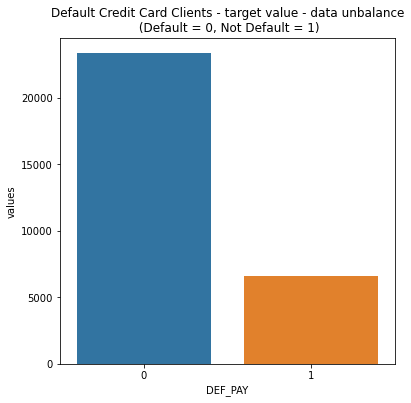

In [11]:
temp = db["DEF_PAY"].value_counts()
df = pd.DataFrame({'DEF_PAY': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'DEF_PAY', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

Como se puede apreciar en la gráfica, la variable respuesta se encuentra altamente desbalanceada por lo que debe ser tenido en cuenta dentro de la metodología de validación, también lo comentado en la revisión bibliográfica el uso de  sobremuestreo y submuestreo

Dentro del repositorio se encuentra una carpeta llamada "Experimentos" donde se realiza la búsqueda de hiperparámetros meiante  GridSearch, por cada modelo se realizaran corridas experimentales con y SMOTE,
las métricas de validación será el área bajo la curva, f1-score

In [15]:
y=db['DEF_PAY']
X=db.drop(['DEF_PAY'],axis=1)

In [21]:
pd.get_dummies(db, columns=['SEX','EDUCATION','MARRIAGE']).to_csv('./Database/DB_v2.csv')